In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import pickle
import glob, os
sns.set_context('talk')

In [4]:
# Read masses

box = 1
snapshot = 11

hdf5_dir =  '/cosma6/data/dp004/dc-cues1/simulations/RSD/'

tracer = 'halos'
filename = f'{tracer}_1024_b{box}.h5'

with h5py.File( hdf5_dir + filename , 'r') as f:    
    m200c = f['GroupMass'][:]


In [5]:
len(m200c)

n_density = len(m200c)/(1024)**3
print(n_density)

0.00035055074840784073


In [6]:
print(f'There are {len(m200c)} halos')

There are 376401 halos


In [7]:
tracer = 'galaxies'
filename = f'{tracer}_1024_b{box}.h5'

with h5py.File( hdf5_dir + filename , 'r') as f:    
    m200c_parent_halo = f['GroupMass'][:]

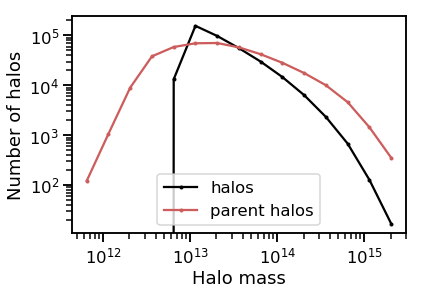

In [8]:

nbins= 15
bins = np.logspace(np.log10(np.min(m200c_parent_halo)),
            np.log10(np.max(m200c_parent_halo)), nbins+1)

mass_func, edges = np.histogram(m200c, bins=bins)
plt.loglog((edges[1:]+edges[:-1])/2.,
           mass_func,color='black', marker='o',markersize=3,
           label='halos')

mass_func, edges = np.histogram(m200c_parent_halo, bins=bins)

plt.loglog((edges[1:]+edges[:-1])/2.,
           mass_func,color='indianred', marker='o',markersize=3,
           label='parent halos')
plt.ylabel('Number of halos')
plt.xlabel('Halo mass')
plt.legend()

In [9]:
print(f'{np.min(m200c):.2E}')

8.03E+12


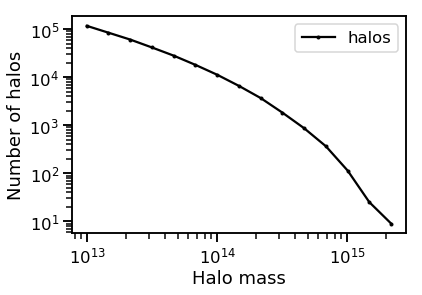

In [10]:

nbins= 15
bins = np.logspace(np.log10(np.min(m200c)),
            np.log10(np.max(m200c)), nbins+1)

mass_func, edges = np.histogram(m200c, bins=bins)
plt.loglog((edges[1:]+edges[:-1])/2.,
           mass_func,color='black', marker='o',markersize=3,
           label='halos')


plt.ylabel('Number of halos')
plt.xlabel('Halo mass')
plt.legend()

In [11]:
m200c_sorted = np.sort(m200c)
print(f'{m200c_sorted[len(m200c_sorted)//2]:.2E}')


1.61E+13


In [12]:
threshold = 1.6e13

In [13]:
len(m200c[m200c < threshold])

187031

In [14]:
len(m200c[m200c > threshold])

189370

In [26]:
data_dir = '/cosma6/data/dp004/dc-cues1/simulations/RSD/tpcfs/'
tracer = 'halos'

In [31]:
# Load real space tpcf
list_dictionaries = []
os.chdir(data_dir + 'real/')
for real_tpcf in glob.glob(f"{tracer}*_m1.pickle"):
    with open(real_tpcf, "rb") as input_file:
        list_dictionaries.append(pickle.load(input_file))

In [29]:
tpcfs = [dictionary['tpcf'] for dictionary in list_dictionaries]
mean_tpcf = np.mean(tpcfs, axis=0)
std_tpcf = np.std(tpcfs, axis=0)

In [32]:
# Load real space tpcf
list_dictionaries = []
os.chdir(data_dir + 'real/')
for real_tpcf in glob.glob(f"{tracer}*_m2.pickle"):
    with open(real_tpcf, "rb") as input_file:
        list_dictionaries.append(pickle.load(input_file))

In [33]:
tpcfs = [dictionary['tpcf'] for dictionary in list_dictionaries]
mean_tpcf_m2 = np.mean(tpcfs, axis=0)
std_tpcf_m2 = np.std(tpcfs, axis=0)

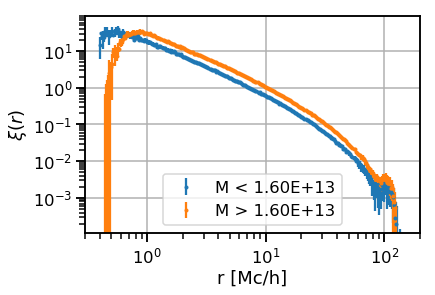

In [37]:
fig = plt.figure()
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
ax.errorbar(list_dictionaries[0]['r'],
            mean_tpcf, yerr = std_tpcf,
           marker = 'o', markersize = 3,
           linestyle='',
            label = f'M < {threshold:.2E}')

ax.errorbar(list_dictionaries[0]['r'],
            mean_tpcf_m2, yerr = std_tpcf_m2,
           marker = 'o', markersize = 3,
           linestyle='',
           label = f'M > {threshold:.2E}')
ax.set_xlabel("r [Mc/h]")
ax.set_ylabel(r"$\xi (r)$")
plt.grid()
plt.legend()